In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [14]:
MAP_SIZE = (100,100)
# an empty density map
map = np.zeros(MAP_SIZE)

In [ ]:
def plot_map(map, title=None):
    cax = plt.matshow(map)
    plt.colorbar(cax)
    if title is not None:
        plt.title(title)
    plt.show()

plot_map(map,"une map vide")

# 1) Generez et affichez une distribution uniforme de loups sur la carte

- Si une zone (case) a une chance sur 2 d'avoir un loup

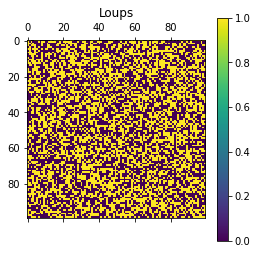

In [8]:
map = np.random.randint(2, size=MAP_SIZE)
plot_map(map, "Loups")

- Si une case a une chance sur 5 d'avoir un loup

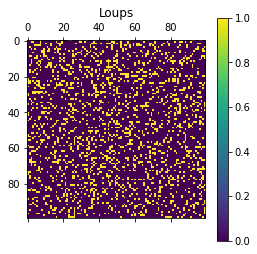

In [45]:
map = np.random.binomial(1, 0.2, MAP_SIZE)
plot_map(map, "Loups")

- Si une case a une chance sur 3 d'avoir un loup et 1 sur 3 d'avoir 2 loups

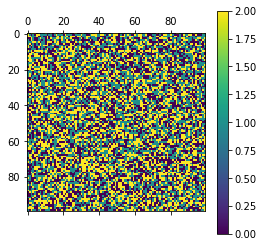

In [47]:
# plot_map(np.vectorize(lambda _:random.randint(0, 2))(np.zeros(MAP_SIZE)), "Loups")
plot_map(np.random.randint(3, size=MAP_SIZE))

- utilisez des statistiques descriptives pour vérifier que vos probabilités sont bonnes

In [16]:
map.mean()  # should be 0.5 or 1/5 or 1

1.0049

# 2) Generez et affichez une distribution gaussienne de loup sur la carte

- On a introduit 1000 loups sur une zone de taille (100,100) vide. Il y a un point d'eau au milieu de la carte, en (50,50). On suppose que les loups doivent regulierement aller s'hydrater, et ont donc tendance à rester plus pres de l'eau. Pour cela, on choisi de représenter leur répartition par une distribution gaussienne centrée sur le point d'eau. 

Vous pouvez utiliser pour cela np.random.multivariate_normal

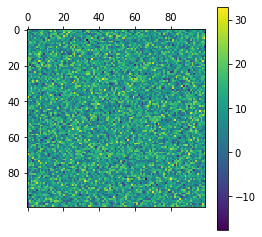

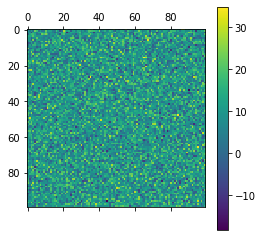

In [61]:
map = np.zeros(MAP_SIZE)
# pos = np.random.multivariate_normal(
#   mean=(50,50),
#   cov=((50, 0), (0,50)),
#   size=(100, 100),
# )[:, :, 0]
# plot_map(map)
pos = np.random.multivariate_normal(
  mean=(50,50),
  cov=((50, 0), (0,50)),
  size=1000,
)
for x, y in pos:
  map[int(x), int(y)] += 1
plot_map(map)

ValueError: too many values to unpack (expected 2)

- utilisez des statistiques descriptives pour vérifier que vos probabilités sont bonnes

# 4) Un modèle dynamique

Simulez une année du scénario suivant :

On introduit aléatoirement de manière uniforme 10 000 moutons et 1000 loups sur la carte. 
Chaque mois :
- le nombre de moutons augmente de 10% sur chaque case
- chaque loup mange un mouton sur sa case. S'il n'y a pas assez de moutons, les loups se partagent les moutons existants s'il y en a ou meurent de faim s'il n'y en a plus.
- Si au début du mois n'y a plus de moutons sur la case, tout les loups de la case meurent.
- 20% des moutons mangés donnent des loups supplémentaires

- jouez sur les coefficients et les equations pour que les populations ne disparaissent pas